In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='/content/drive/MyDrive/New Year Sales Data (1).csv'

In [3]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Load and Explore the Dataset
try:
    new_year_data = pd.read_csv(file_path, encoding='latin-1')
except UnicodeDecodeError:
    # If latin-1 fails, try cp1252
    new_year_data = pd.read_csv(file_path, encoding='cp1252')

In [6]:
new_year_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
print(new_year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [8]:
new_year_data_list= list(new_year_data.columns)
print(new_year_data_list)

['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount', 'Status', 'unnamed1']


In [9]:
# Step 3: Data Cleaning
new_year_data.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [10]:
new_year_data.drop(['Cust_name', 'Status', 'unnamed1'], axis=1, inplace=True)

In [11]:
new_year_data.dropna(subset=['Amount'], inplace=True)

In [12]:
new_year_data['Amount'] = new_year_data['Amount'].astype(int)

In [13]:
# Step 4: Data Overview and Summary
print(new_year_data.describe())

            User_ID           Age  Marital_Status        Orders        Amount
count  1.123900e+04  11239.000000    11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357        0.420055      2.489634   9453.610553
std    1.716039e+03     12.753866        0.493589      1.114967   5222.355168
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000


In [14]:
print("Unique values per column:")
print(new_year_data.nunique())

Unique values per column:
User_ID             3752
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64


In [15]:
# Exploratory Data Analysis (EDA)

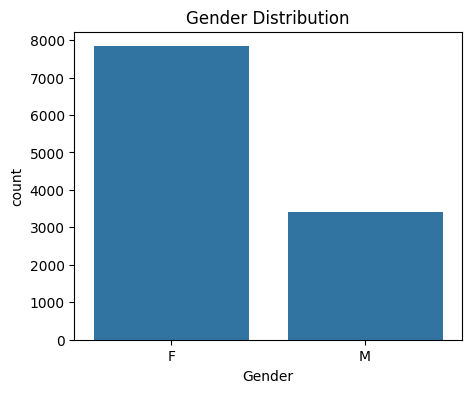

In [16]:
# 1. Gender Analysis
plt.figure(figsize=(5,4))
sns.countplot(data=new_year_data, x='Gender')
plt.title("Gender Distribution")
plt.show()

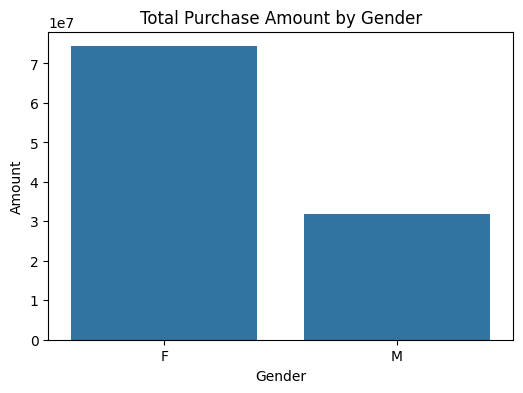

In [17]:
plt.figure(figsize=(6,4))
gender_amount = new_year_data.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(data=gender_amount, x='Gender', y='Amount')
plt.title("Total Purchase Amount by Gender")
plt.show()

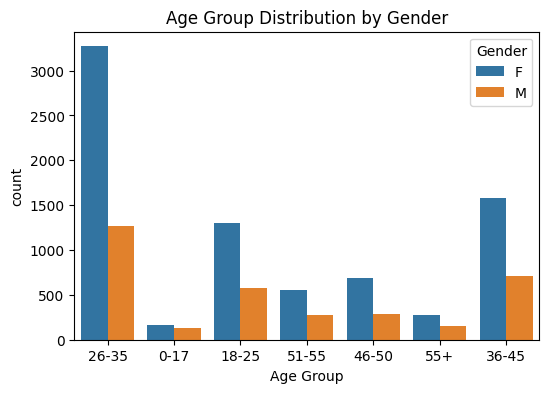

In [18]:
# 2. Age Group Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=new_year_data, x='Age Group', hue='Gender')
plt.title("Age Group Distribution by Gender")
plt.show()

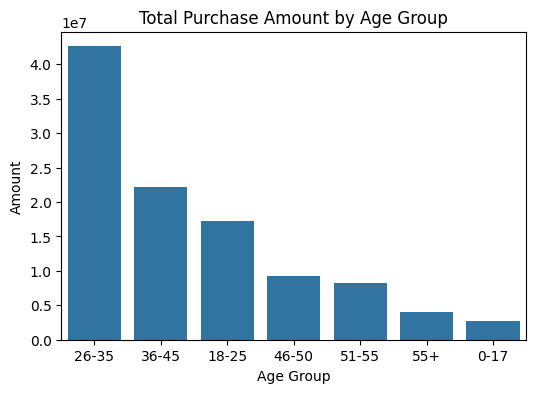

In [19]:

age_amount = new_year_data.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(data=age_amount, x='Age Group', y='Amount')
plt.title("Total Purchase Amount by Age Group")
plt.show()

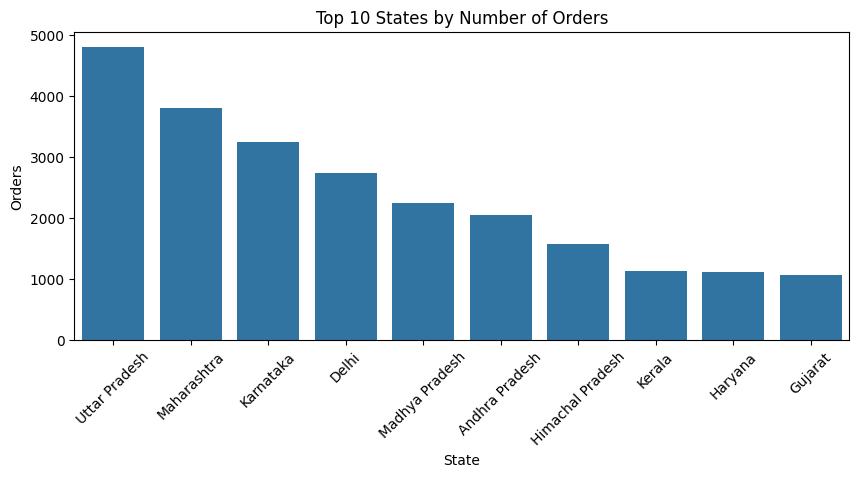

In [20]:
# 3. State Analysis
state_orders = new_year_data.groupby('State')['Orders'].sum().reset_index().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(data=state_orders, x='State', y='Orders')
plt.xticks(rotation=45)
plt.title("Top 10 States by Number of Orders")
plt.show()

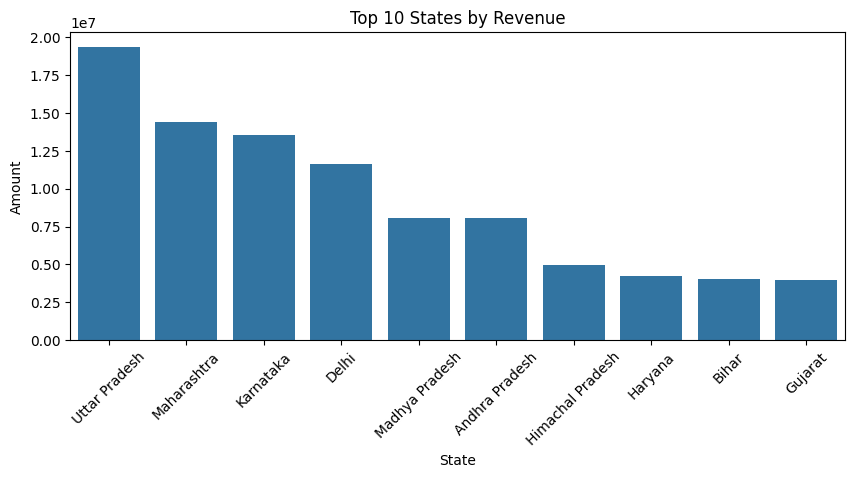

In [21]:
state_amount = new_year_data.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(data=state_amount, x='State', y='Amount')
plt.xticks(rotation=45)
plt.title("Top 10 States by Revenue")
plt.show()

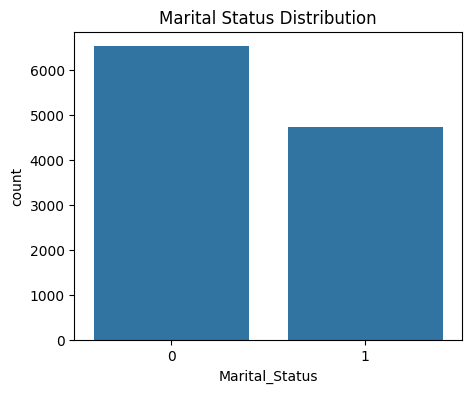

In [22]:
# 4. Marital Status Analysis
plt.figure(figsize=(5,4))
sns.countplot(data=new_year_data, x='Marital_Status')
plt.title("Marital Status Distribution")
plt.show()

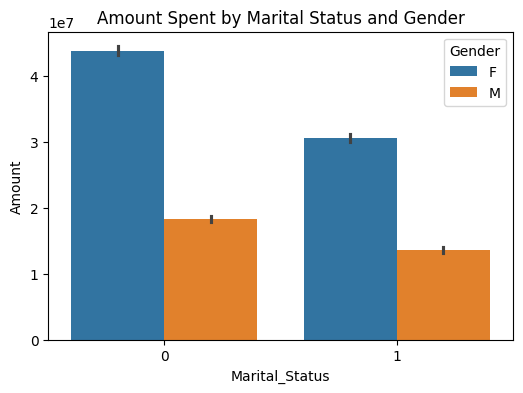

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(data=new_year_data, x='Marital_Status', y='Amount', hue='Gender', estimator=sum)
plt.title("Amount Spent by Marital Status and Gender")
plt.show()


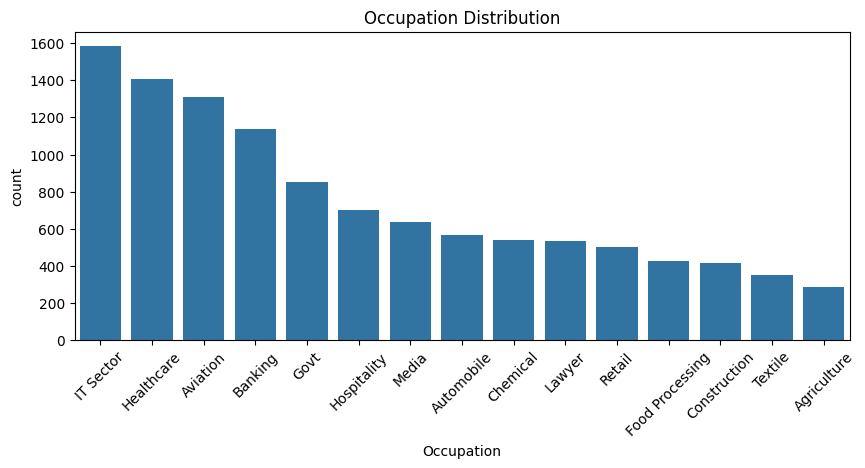

In [24]:
# 5. Occupation Analysis
plt.figure(figsize=(10,4))
sns.countplot(data=new_year_data, x='Occupation', order=new_year_data['Occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Occupation Distribution")
plt.show()


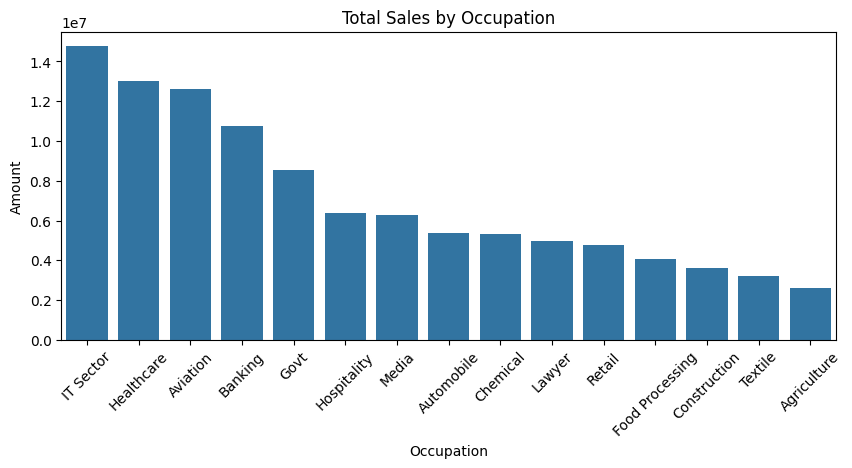

In [25]:

occupation_amount = new_year_data.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(data=occupation_amount, x='Occupation', y='Amount')
plt.xticks(rotation=45)
plt.title("Total Sales by Occupation")
plt.show()

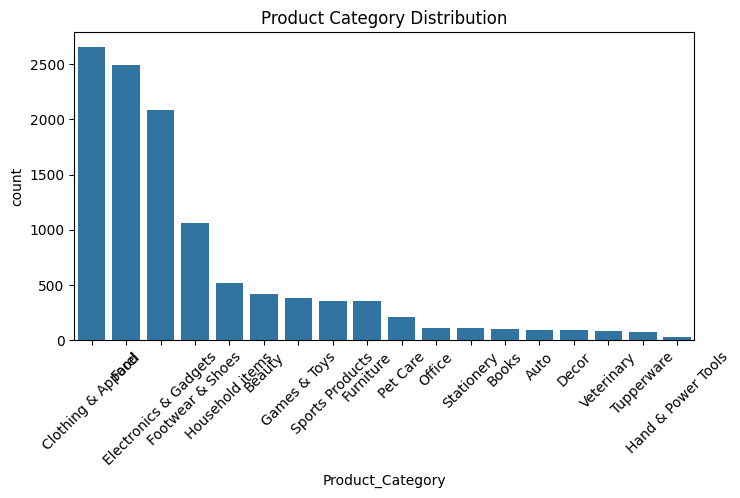

In [26]:
# 6. Product Category Analysis
plt.figure(figsize=(8,4))
sns.countplot(data=new_year_data, x='Product_Category', order=new_year_data['Product_Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Product Category Distribution")
plt.show()

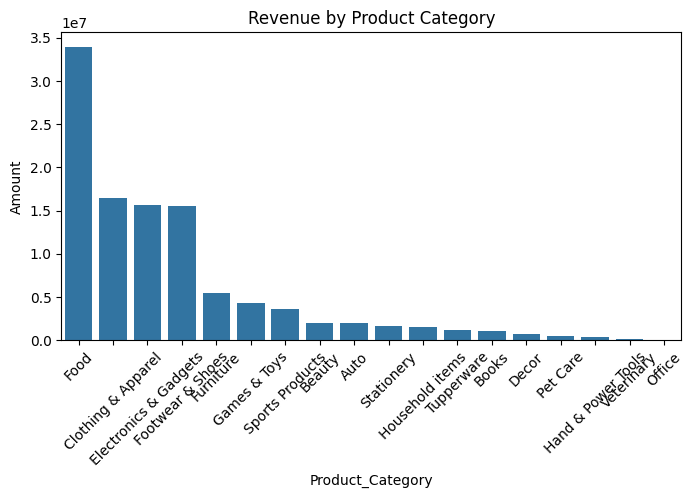

In [27]:
category_amount = new_year_data.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=category_amount, x='Product_Category', y='Amount')
plt.xticks(rotation=45)
plt.title("Revenue by Product Category")
plt.show()

In [28]:
print(" Summary of Findings:")
print("- Females tend to spend slightly more than males.")
print("- The age group 26-35(in that too females more) is the most active and spends the most.")
print("- Uttar Pradesh and Maharashtra are top in orders and revenue.")
print("- Married individuals show higher spending.")
print("- Healthcare, IT, and Aviation employees are major contributors.")
print("- Food and Apparel are top-selling product categories.")

 Summary of Findings:
- Females tend to spend slightly more than males.
- The age group 26-35(in that too females more) is the most active and spends the most.
- Uttar Pradesh and Maharashtra are top in orders and revenue.
- Married individuals show higher spending.
- Healthcare, IT, and Aviation employees are major contributors.
- Food and Apparel are top-selling product categories.


In [29]:
# Additional Questions

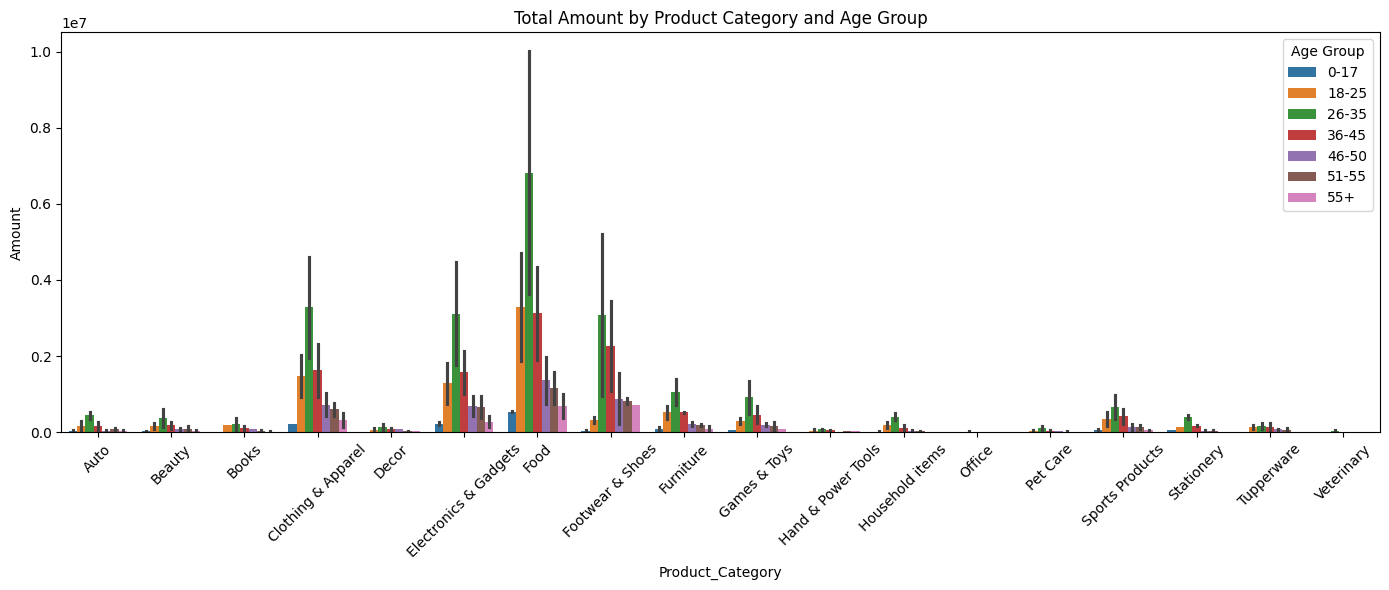

26-35 years of age group in females contributes the most to each product category.


In [31]:
# 1. Which age group contributes the most to each product category, and does this vary by gender?
age_product_gender = new_year_data.groupby(['Product_Category', 'Age Group', 'Gender'])['Amount'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=age_product_gender, x='Product_Category', y='Amount', hue='Age Group')
plt.title("Total Amount by Product Category and Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("26-35 years of age group in females contributes the most to each product category.")

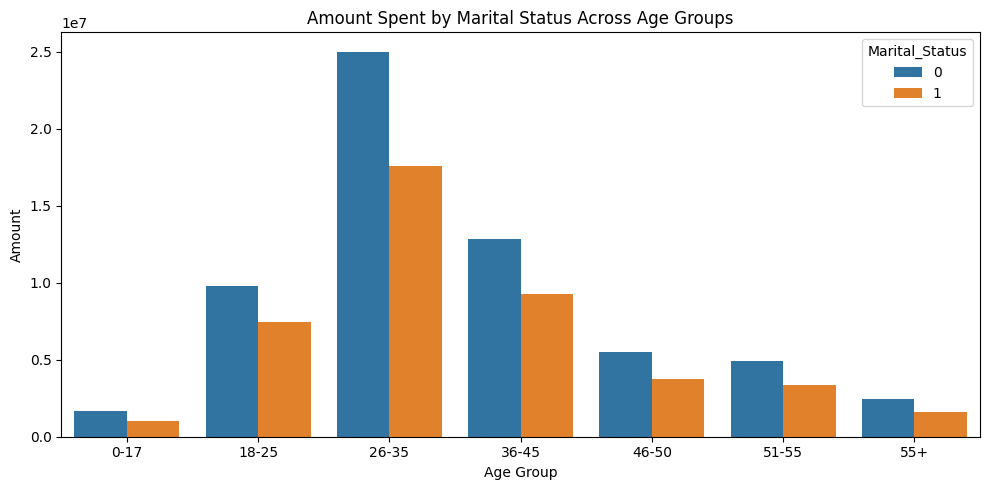

26-35 years of married couples spend the most.


In [33]:
# 2. How does the amount spent vary by marital status across different age groups?
marital_age_spend = new_year_data.groupby(['Age Group', 'Marital_Status'])['Amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=marital_age_spend, x='Age Group', y='Amount', hue='Marital_Status')
plt.title("Amount Spent by Marital Status Across Age Groups")
plt.tight_layout()
plt.show()
print("26-35 years of married couples spend the most.")

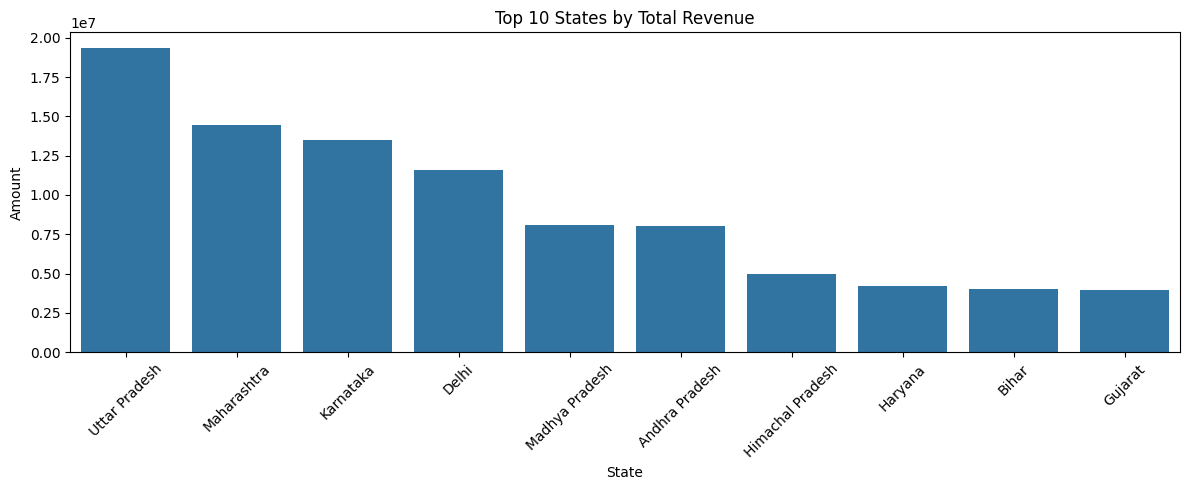

Uttar Pradesh has the highest growth in terms of orders and revenue, according to me inspite of seasonal change the reason is growing popoulation in this state.


In [35]:
# 2. Which states show the highest growth in orders and revenue, and are there seasonal spikes in sales?
state_growth = new_year_data.groupby('State')[['Orders', 'Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=state_growth.head(10), x='State', y='Amount')
plt.title("Top 10 States by Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Uttar Pradesh has the highest growth in terms of orders and revenue, according to me inspite of seasonal change the reason is growing popoulation in this state.")

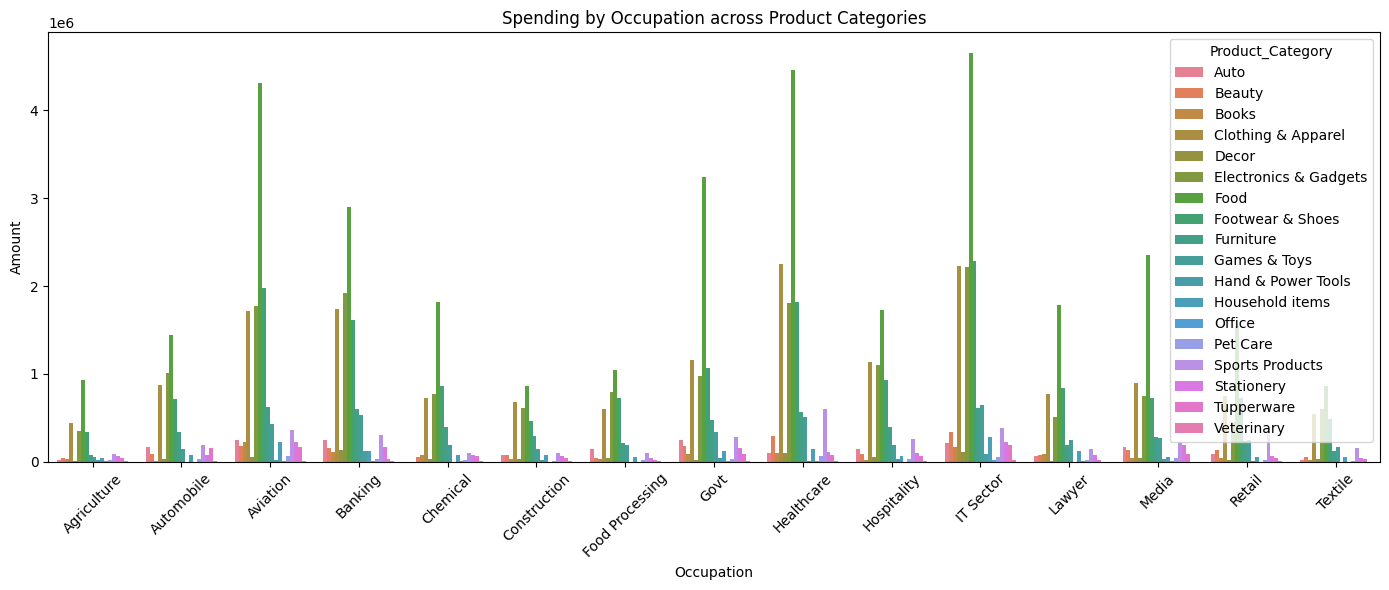

All the occupations are preferable to to spend most on Food.


In [37]:
# 4. Are there specific occupations that prefer particular product categories more than others?
occupation_product = new_year_data.groupby(['Occupation', 'Product_Category'])['Amount'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=occupation_product, x='Occupation', y='Amount', hue='Product_Category')
plt.title("Spending by Occupation across Product Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("All the occupations are preferable to to spend most on Food.")

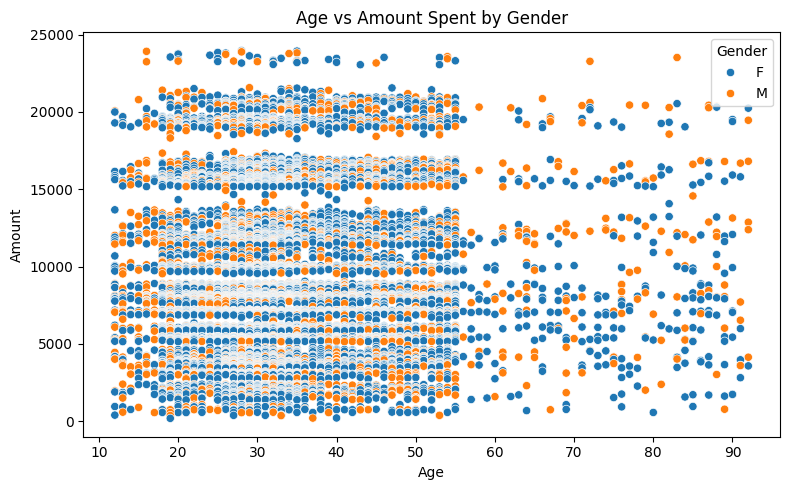

Females tend to spend more than males in every age group. 


In [40]:
# 5. What is the correlation between age and spending amount, and does this differ by gender?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=new_year_data, x='Age', y='Amount', hue='Gender')
plt.title("Age vs Amount Spent by Gender")
plt.tight_layout()
plt.show()
print("Females tend to spend more than males in every age group. ")